In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import warnings

from dateutil.parser import parse
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [2]:
acsv = ['Acquisition_2000Q1.txt','Acquisition_2000Q2.txt','Acquisition_2000Q3.txt','Acquisition_2000Q4.txt']
pcsv = ['Performance_2000Q1.csv','Performance_2000Q2.csv','Performance_2000Q3.csv','Performance_2000Q4.csv']

In [3]:
Acquisitions_Variables = ["LOAN_ID","ORIG_CHN","Seller.Name","ORIG_RT","ORIG_AMT","ORIG_TRM","ORIG_DTE",
                          "FRST_DTE","OLTV","OCLTV","NUM_BO","DTI","CSCORE_B","FTHB_FLG","PURPOSE","PROP_TYP",
                          "NUM_UNIT","OCC_STAT","STATE","ZIP_3","MI_PCT","Product.Type","CSCORE_C","MI_TYPE","RELOCATION_FLG"]

Performance_Variables = ["LOAN_ID","Monthly.Rpt.Prd","Servicer.Name","LAST_RT","LAST_UPB","Loan.Age",
                         "Months.To.Legal.Mat","Adj.Month.To.Mat","Maturity.Date","MSA","Delq.Status",
                         "MOD_FLAG","Zero.Bal.Code","ZB_DTE","LPI_DTE","FCC_DTE","DISP_DT","FCC_COST",
                         "PP_COST","AR_COST","IE_COST","TAX_COST","NS_PROCS","CE_PROCS","RMW_PROCS",
                         "O_PROCS","NON_INT_UPB","PRIN_FORG_UPB_FHFA","REPCH_FLAG","PRIN_FORG_UPB_OTH","TRANSFER_FLG"]

In [4]:
a = [0] * len(acsv)
p = [0] * len(pcsv)

for i in range(len(acsv)):
    a[i] = pd.read_csv(acsv[i],header=None,sep='|',names=Acquisitions_Variables)
    a[i]['No.'] = i + 1
    p[i] = pd.read_csv(pcsv[i],header=0,names=Performance_Variables)
    p[i]['No.'] = i + 1

In [5]:
Acquisition = pd.concat(a,ignore_index=True)
Acquisition = Acquisition.iloc[:,:-1]
Acquisition.head()

,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C,MI_TYPE,RELOCATION_FLG
0,100007365142,R,"JPMORGAN CHASE BANK, NA",8.000,75000,360,12/1999,02/2000,79.0,NaN,...,SF,1,P,PA,173,NaN,FRM,NaN,NaN,N
1,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000,180,01/2000,03/2000,69.0,NaN,...,CO,1,P,MD,208,NaN,FRM,NaN,NaN,N
2,100011322040,C,AMTRUST BANK,7.750,123000,360,11/1999,01/2000,80.0,NaN,...,SF,1,P,MO,630,NaN,FRM,NaN,NaN,N
3,100015192562,R,OTHER,8.500,51000,360,02/2000,04/2000,95.0,NaN,...,SF,1,P,GA,316,25.0,FRM,NaN,1.0,N
4,100015874399,C,"CITIMORTGAGE, INC.",8.750,242000,360,02/2000,04/2000,95.0,NaN,...,SF,1,P,FL,335,30.0,FRM,NaN,1.0,N


In [6]:
Performance = pd.concat(p,ignore_index=True)
Performance = Performance.iloc[:,:-1]
Performance.head()

,LOAN_ID,Monthly.Rpt.Prd,Servicer.Name,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Maturity.Date,MSA,...,TAX_COST,NS_PROCS,CE_PROCS,RMW_PROCS,O_PROCS,NON_INT_UPB,PRIN_FORG_UPB_FHFA,REPCH_FLAG,PRIN_FORG_UPB_OTH,TRANSFER_FLG
0,100007365142,04/01/2003,"JPMORGAN CHASE BANK, NA",8.000,72564.61,39,321.0,0.0,01/2030,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,100007386460,05/01/2001,NaN,7.875,52830.25,15,165.0,0.0,02/2015,47900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,100011322040,04/01/2003,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",7.750,119163.67,40,320.0,0.0,12/2029,41180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,100015192562,12/01/2004,OTHER,8.500,30857.39,57,303.0,0.0,03/2030,46660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,100015874399,09/01/2002,"CITIMORTGAGE, INC.",8.750,237767.17,30,330.0,0.0,03/2030,45300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [7]:
AP = pd.merge(Acquisition,Performance,how='inner',on="LOAN_ID")
AP.head()

,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,TAX_COST,NS_PROCS,CE_PROCS,RMW_PROCS,O_PROCS,NON_INT_UPB,PRIN_FORG_UPB_FHFA,REPCH_FLAG,PRIN_FORG_UPB_OTH,TRANSFER_FLG
0,100007365142,R,"JPMORGAN CHASE BANK, NA",8.000,75000,360,12/1999,02/2000,79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,100007386460,B,"JPMORGAN CHASE BANK, NA",7.875,55000,180,01/2000,03/2000,69.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,100011322040,C,AMTRUST BANK,7.750,123000,360,11/1999,01/2000,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,100015192562,R,OTHER,8.500,51000,360,02/2000,04/2000,95.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,100015874399,C,"CITIMORTGAGE, INC.",8.750,242000,360,02/2000,04/2000,95.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [8]:
AP = AP.drop(columns=['LOAN_ID','Seller.Name','Maturity.Date','Product.Type'])
notnull_ratio = AP.notnull().sum(axis=0) / AP.shape[0]
notnull_ratio = notnull_ratio[notnull_ratio.values >= 0.8]
AP = AP[notnull_ratio.index.tolist()]

In [9]:
AP.ZB_DTE = pd.to_datetime(AP.ZB_DTE)
AP.ZB_DTE = AP.ZB_DTE.fillna(pd.Timestamp(AP.ZB_DTE.mode().values[0]))
AP.ORIG_DTE = pd.to_datetime(AP.ORIG_DTE)
AP.FRST_DTE = pd.to_datetime(AP.FRST_DTE)
AP['Monthly.Rpt.Prd'] = pd.to_datetime(AP['Monthly.Rpt.Prd'])

begin_time = np.array([AP.ZB_DTE.min(),AP.ORIG_DTE.min(),AP.FRST_DTE.min(),AP['Monthly.Rpt.Prd'].min()]).min()
AP.ZB_DTE = AP.ZB_DTE - begin_time
AP.ORIG_DTE = AP.ORIG_DTE - begin_time
AP.FRST_DTE = AP.FRST_DTE - begin_time
AP['Monthly.Rpt.Prd'] = AP['Monthly.Rpt.Prd'] - begin_time

AP.ZB_DTE = AP.ZB_DTE.dt.days
AP.ORIG_DTE = AP.ORIG_DTE.dt.days
AP.FRST_DTE = AP.FRST_DTE.dt.days
AP['Monthly.Rpt.Prd'] = AP['Monthly.Rpt.Prd'].dt.days

In [10]:
fillinlist = notnull_ratio[notnull_ratio.values < 1].index.tolist()
for i in fillinlist:
    AP[i] = AP[i].fillna(AP[i].mode().values[0])
AP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218592 entries, 0 to 1218591
Data columns (total 30 columns):
ORIG_CHN               1218592 non-null object
ORIG_RT                1218592 non-null float64
ORIG_AMT               1218592 non-null int64
ORIG_TRM               1218592 non-null int64
ORIG_DTE               1218592 non-null int64
FRST_DTE               1218592 non-null int64
OLTV                   1218592 non-null float64
NUM_BO                 1218592 non-null float64
DTI                    1218592 non-null float64
CSCORE_B               1218592 non-null float64
FTHB_FLG               1218592 non-null object
PURPOSE                1218592 non-null object
PROP_TYP               1218592 non-null object
NUM_UNIT               1218592 non-null int64
OCC_STAT               1218592 non-null object
STATE                  1218592 non-null object
ZIP_3                  1218592 non-null int64
RELOCATION_FLG         1218592 non-null object
Monthly.Rpt.Prd        1218592 non-null in

In [11]:
AP.FTHB_FLG = AP.FTHB_FLG.replace('U',AP.FTHB_FLG.mode().values[0])
AP.FTHB_FLG = AP.FTHB_FLG.replace(['N','Y'],[0,1])
AP.PURPOSE = AP.PURPOSE.replace('U','R')
AP.RELOCATION_FLG = AP.RELOCATION_FLG.replace(['N','Y'],[0,1])

In [12]:
dummy_variables = ['ORIG_CHN','PURPOSE','PROP_TYP','OCC_STAT']
for i in dummy_variables:
    dummies = pd.get_dummies(AP[i],prefix=i) 
    AP = pd.concat([AP,dummies],axis=1)
AP = AP.drop(columns=dummy_variables)

In [13]:
ZeroBalCode_dummies = pd.get_dummies(AP['Zero.Bal.Code'].astype(str), prefix ='ZeroBalCode')
AP = pd.concat([AP,ZeroBalCode_dummies['ZeroBalCode_1.0'],ZeroBalCode_dummies['ZeroBalCode_15.0'],ZeroBalCode_dummies['ZeroBalCode_16.0'],
                ZeroBalCode_dummies['ZeroBalCode_2.0'],ZeroBalCode_dummies['ZeroBalCode_3.0'],ZeroBalCode_dummies['ZeroBalCode_6.0'],
                ZeroBalCode_dummies['ZeroBalCode_9.0']],axis=1)
AP = AP.drop(columns=['Zero.Bal.Code'])

In [14]:
region_variables = ['ZIP_3','MSA']
new_state_mapping = {'AK':6.3, 'WV':5.8, 'DC':5.6, 'MS':5.4, 'LA':5.1,
                     'MT':5.1, 'NM':5.1, 'CA':5,   'OR':5,   'WA':4.9,
                     'AL':4.7, 'HI':4.7, 'NY':4.7, 'ID':4.6, 'TX':4.6,
                     'AR':4.4, 'IL':4.2, 'KY':4.2, 'AZ':4.1, 'OH':4.1,
                     'PA':4.1, 'WY':4.1, 'RI':4,   'SC':4,   'NV':4,
                     'NJ':3.8, 'FL':3.7, 'GA':3.7, 'TN':3.7, 'DE': 3.5,
                     'KS':3.4, 'MD':3.4, 'MI':3.3, 'NC':3.3, 'IN': 3.2,
                     'OK':3.2, 'WI':3.2, 'MO':3.1, 'UT':3.1, 'MA':3,
                     'MN':3,   'CO':2.8, 'CT':2.8, 'NE':2.8, 'NH':2.7,
                     'VT':2.7, 'VA':2.6, 'IA':2.4, 'SD':2.4, 'ND':3, 
                     'ME':4.5, 'GU':15,  'PR':11.2, 'VI':0.8}
AP['STATE'] = AP['STATE'].map(new_state_mapping)
# state_dummies = pd.get_dummies(AP['STATE'], prefix='STATE') 
# AP = pd.concat([AP, state_dummies], axis = 1)
AP = AP.drop(region_variables,axis = 1)
AP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218592 entries, 0 to 1218591
Data columns (total 44 columns):
ORIG_RT                1218592 non-null float64
ORIG_AMT               1218592 non-null int64
ORIG_TRM               1218592 non-null int64
ORIG_DTE               1218592 non-null int64
FRST_DTE               1218592 non-null int64
OLTV                   1218592 non-null float64
NUM_BO                 1218592 non-null float64
DTI                    1218592 non-null float64
CSCORE_B               1218592 non-null float64
FTHB_FLG               1218592 non-null int64
NUM_UNIT               1218592 non-null int64
STATE                  1218592 non-null float64
RELOCATION_FLG         1218592 non-null int64
Monthly.Rpt.Prd        1218592 non-null int64
LAST_RT                1218592 non-null float64
LAST_UPB               1218592 non-null float64
Loan.Age               1218592 non-null int64
Months.To.Legal.Mat    1218592 non-null float64
Adj.Month.To.Mat       1218592 non-null f

In [15]:
AP = AP.drop(columns=['ORIG_DTE','Loan.Age'])

In [16]:
AP.to_csv('AP2000.csv')

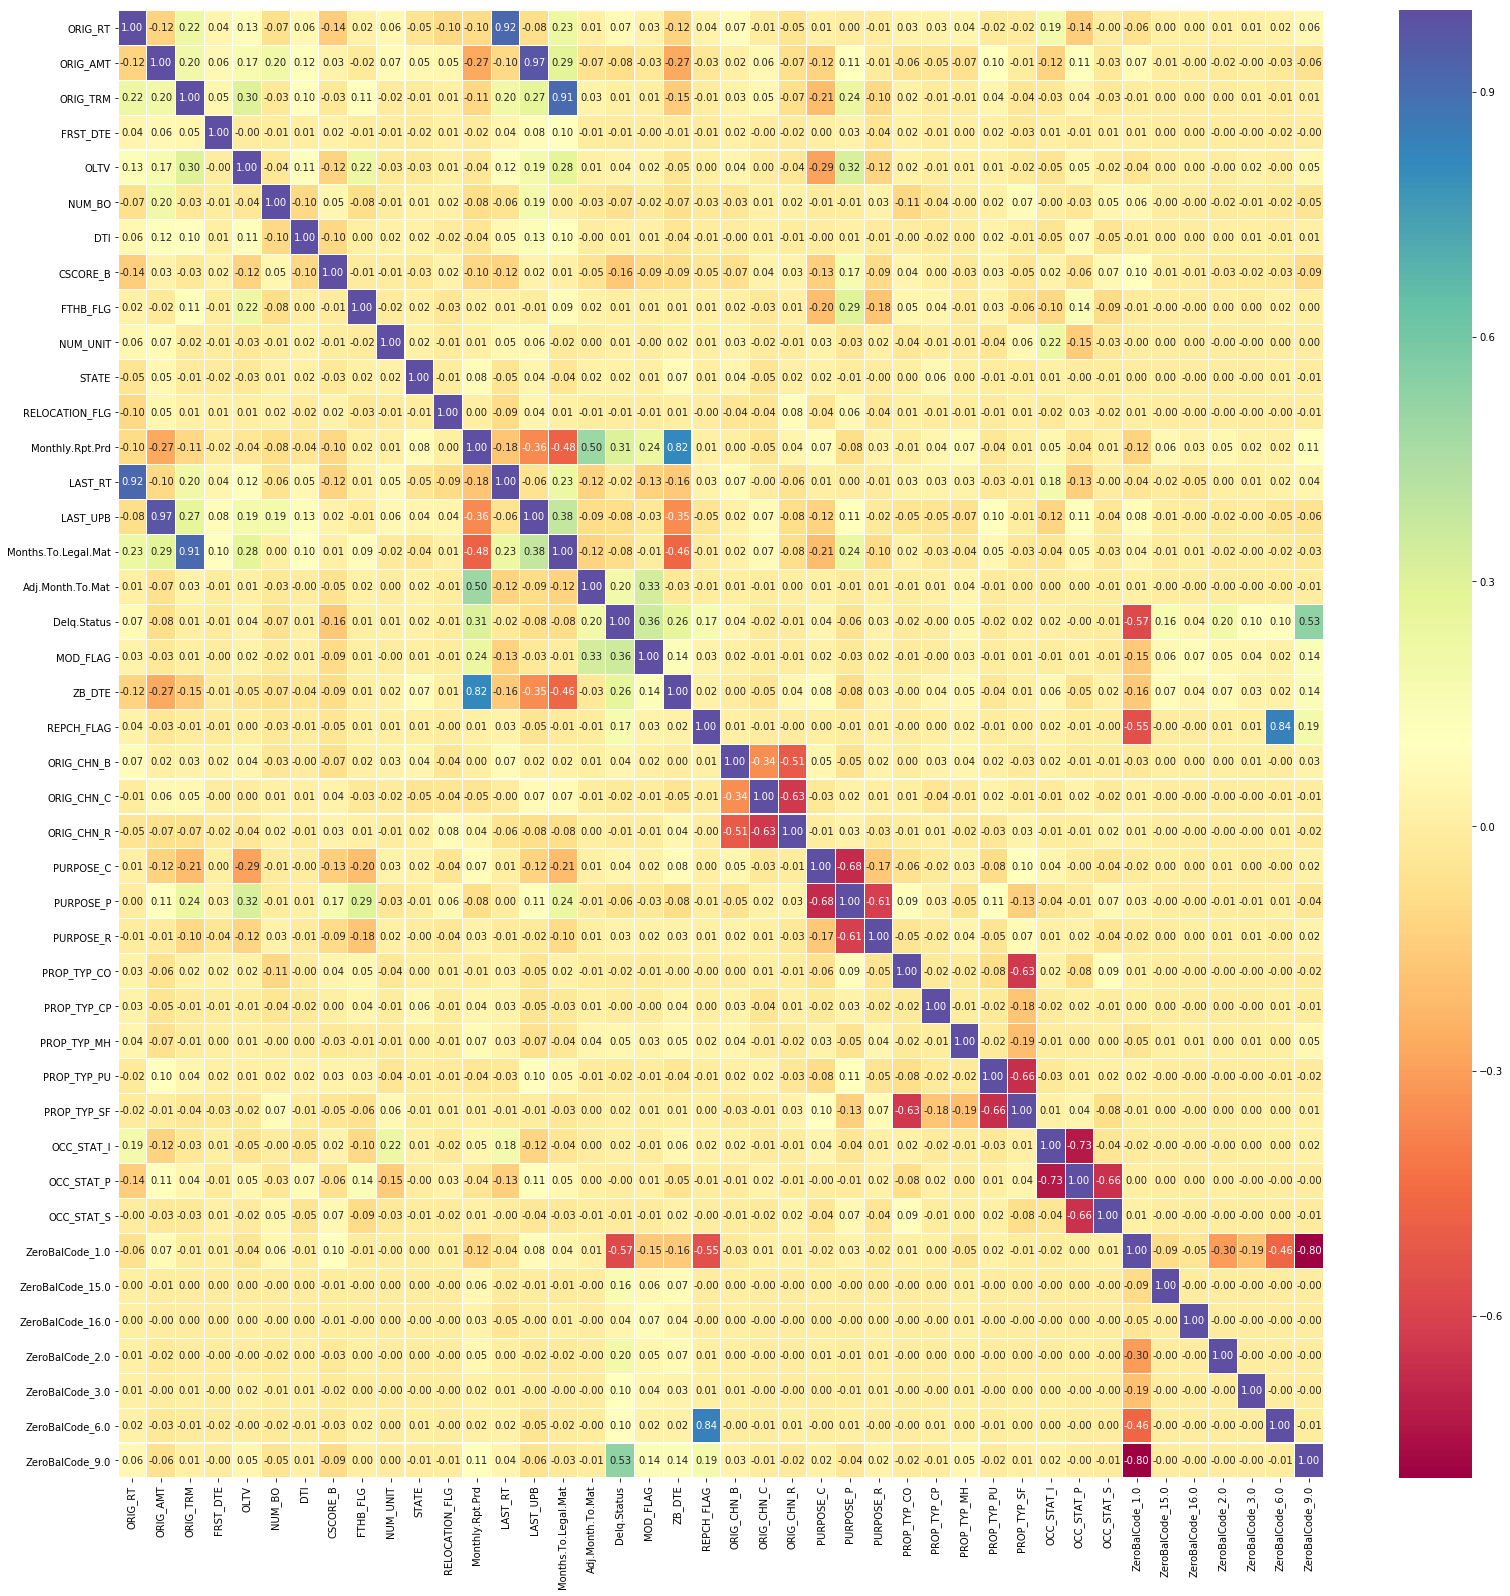

In [17]:
fig,ax = plt.subplots(figsize=(27,27))
sns.heatmap(AP.corr(),annot=True,linewidths=.1,fmt= '.2f',ax=ax,cmap=plt.cm.Spectral)
plt.show()

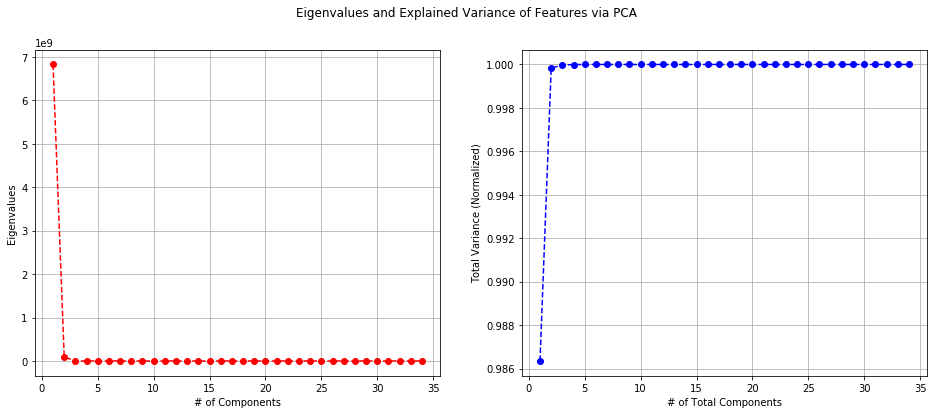

In [21]:
ZBC = ['ZeroBalCode_1.0', 'ZeroBalCode_15.0', 'ZeroBalCode_16.0', 'ZeroBalCode_2.0', 'ZeroBalCode_3.0', 'ZeroBalCode_6.0', 'ZeroBalCode_9.0','Delq.Status']

x_classification = AP.drop(ZBC,axis=1)
y_classification = AP.loc[:,ZBC]

pca = PCA(n_components=x_classification.shape[1], whiten=True)
B = pca.fit_transform(x_classification)
L = pca.explained_variance_

fig = plt.figure(figsize=(16,6))
plt.suptitle('Eigenvalues and Explained Variance of Features via PCA')

plt.subplot(121)
plt.plot(np.arange(x_classification.shape[1]) + 1,L,'o--r')
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.grid(True)

plt.subplot(122)
var = np.cumsum(L) / np.sum(L)
plt.xlabel('# of Total Components')
plt.ylabel('Total Variance (Normalized)')
plt.plot(np.arange(x_classification.shape[1]) + 1,var,'o--b')
plt.grid(True)

plt.show()